 
 # Diabetes (DT, RT, KNN)
 `Diabetes (DT, RT, KNN)`
 
 
 **Diabetes (DT, RT, KNN)**
 * Diabetes (DT, RT, KNN)
 Diabetes (DT, RT, KNN)
>Diabetes (DT, RT, KNN)
 

In [1]:
# Importing libraries

# for data wrangling and manipulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("E:/Data Science/Datasets/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# getiing statistics of the data

data.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# getting info about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


----------------------------------------------------------------
Observation:: 
     
    * Only two float values column and rest are integer values columns
    * No categorial feature available
    * No NaN/ Missing values present

# Plotting the Count Plot

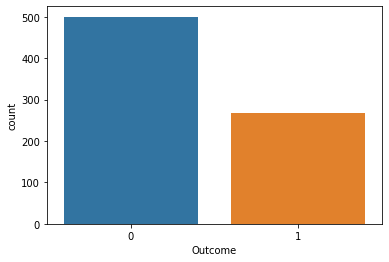

In [5]:
sns.countplot(data['Outcome'])

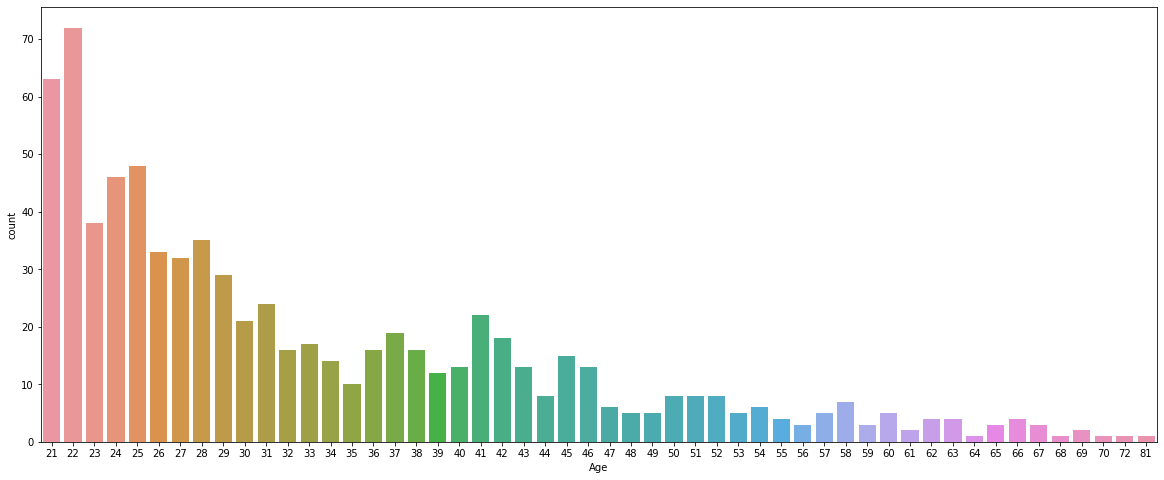

In [6]:
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(data['Age'], ax = ax)

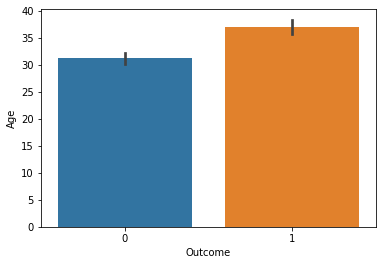

In [7]:
sns.barplot(y = 'Age', x= 'Outcome', data = data)

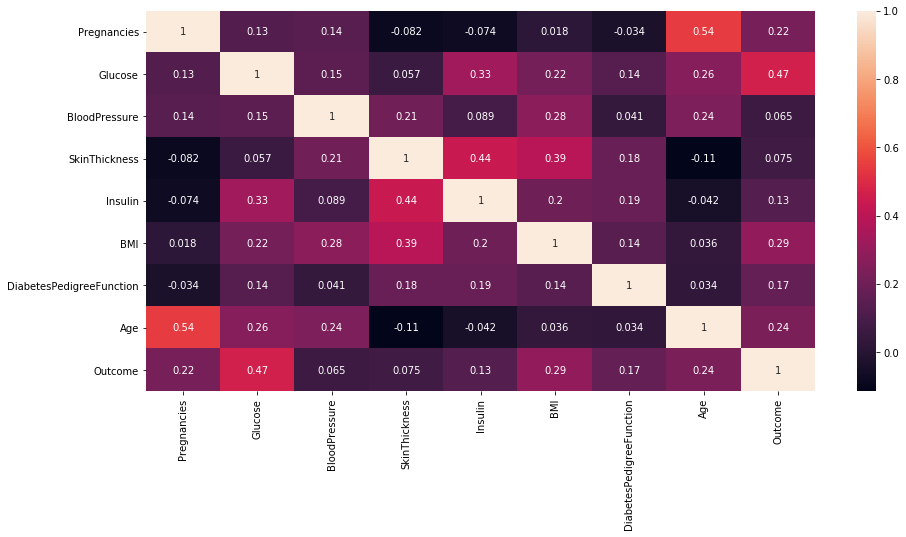

In [8]:
# Drawing heatmap to see the correlation

plt.figure(figsize = (15, 7))
sns.heatmap(data.corr(), annot = True)

In [9]:
# Setting the predictor and target variable

X = data.drop(['Outcome'], axis = 1)               # Predictor Variable
Y = data['Outcome']                              # Target Variable

X.shape, Y.shape

((768, 8), (768,))

Observation::
 
 * Shape of the target variable must be in the format (n,) so that it can best fit in the model.
 * In other cases we have to use ravel() function to flatten the variable first.
 * Syntax :: forest . fit ( train_x , train_y . values . ravel () )
 * Syntax :: knn . fit( X_train , np . ravel ( y_train , order='C' ) )
 > In both syntax above, we are converting a df/series into an array 

In [10]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 19)
x_train.shape, x_test.shape

((614, 8), (154, 8))

# Using Gini Criterion method on Classifiers ::

In [11]:
# performing prediction with out feature scaling

dt_model = DecisionTreeClassifier(criterion= 'gini', random_state= 12)
rt_model = RandomForestClassifier(criterion = 'gini', random_state= 13)
kn_model = KNeighborsClassifier()


In [12]:
dt_model.fit(x_train, y_train)
dt_pred1 = dt_model.predict(x_test)
print('Accuracy Score ::', accuracy_score(y_test, dt_pred1))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, dt_pred1))

Accuracy Score :: 0.6688311688311688


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       100
           1       0.53      0.57      0.55        54

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.68      0.67      0.67       154



In [13]:
rt_model.fit(x_train, y_train)
rt_pred1 = rt_model.predict(x_test)
print('Accuracy Score ::', accuracy_score(y_test, rt_pred1))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, rt_pred1))

Accuracy Score :: 0.8051948051948052


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       100
           1       0.79      0.61      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [14]:
kn_model.fit(x_train, y_train)
kn_pred1 = kn_model.predict(x_test)
print('Accuracy Score ::', accuracy_score(y_test, kn_pred1))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, kn_pred1))

Accuracy Score :: 0.7597402597402597


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



# Using Entropy Criterion method on Classifiers ::

In [15]:
# performing prediction with out feature scaling

dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state= 12)
rt_model2 = RandomForestClassifier(criterion = 'entropy', random_state= 13)
kn_model2 = KNeighborsClassifier(algorithm= 'kd_tree')


In [16]:
dt_model2.fit(x_train, y_train)
dt_pred2 = dt_model2.predict(x_test)
print('Accuracy Score ::', accuracy_score(y_test, dt_pred2))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, dt_pred2))

Accuracy Score :: 0.7467532467532467


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.64      0.65      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [17]:
rt_model2.fit(x_train, y_train)
rt_pred2 = rt_model2.predict(x_test)
print('Accuracy Score ::', accuracy_score(y_test, rt_pred2))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, rt_pred2))

Accuracy Score :: 0.7922077922077922


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [18]:
kn_model2.fit(x_train, y_train)
kn_pred2 = kn_model2.predict(x_test)
print('Accuracy Score ::', accuracy_score(y_test, kn_pred2))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, kn_pred2))

Accuracy Score :: 0.7597402597402597


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [19]:
# Defining Predictor and Target variable

X = data.drop(['Outcome'], axis = 1)       # Predictor Variable
Y = data['Outcome']                        # Target Variable

# Splitting the data into Training and Testing data :


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 1, test_size = 0.20)

# Feature Scaling::

  * Since no categorial data is present hence performing scaling to standardized the data before feeding it into model

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

x_train_norm = scaler_minmax.fit_transform(x_train)
x_test_norm  = scaler_minmax.fit_transform(x_test)

x_train_stan = scaler_standard.fit_transform(x_train)
x_test_stan = scaler_standard.fit_transform(x_test)

# Using Standardized data for models

In [22]:
# feeding the scaled data into models

dt_model.fit(x_train_stan, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [23]:
dt_pred3 = dt_model.predict(x_test_stan)
print('Accuracy Score ::', accuracy_score(y_test, dt_pred3))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, dt_pred3))

Accuracy Score :: 0.6753246753246753


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        99
           1       0.54      0.58      0.56        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [24]:
rt_model.fit(x_train_stan, y_train)
rt_pred3 = rt_model.predict(x_test_stan)
print('Accuracy Score ::', accuracy_score(y_test, rt_pred3))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, rt_pred3))

Accuracy Score :: 0.7792207792207793


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [25]:
kn_model.fit(x_train_stan, y_train)
kn_pred3 = kn_model.predict(x_test_stan)
print('Accuracy Score ::', accuracy_score(y_test, kn_pred3))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, kn_pred3))

Accuracy Score :: 0.7857142857142857


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [26]:
dt_model2.fit(x_train_stan, y_train)
dt_pred4 = dt_model2.predict(x_test_stan)
print('Accuracy Score ::', accuracy_score(y_test, dt_pred4))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, dt_pred4))

Accuracy Score :: 0.7662337662337663


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [27]:
rt_model2.fit(x_train_stan, y_train)
rt_pred4 = rt_model2.predict(x_test_stan)
print('Accuracy Score ::', accuracy_score(y_test, rt_pred4))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, rt_pred4))

Accuracy Score :: 0.7727272727272727


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



In [28]:
kn_model2.fit(x_train_stan, y_train)
kn_pred4 = kn_model2.predict(x_test_stan)
print('Accuracy Score ::', accuracy_score(y_test, kn_pred4))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, kn_pred4))

Accuracy Score :: 0.7857142857142857


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# Using the Normalized data for models

In [29]:
dt_model.fit(x_train_norm, y_train)
dt_pred5 = dt_model.predict(x_test_norm)
print('Accuracy Score ::', accuracy_score(y_test, dt_pred5))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, dt_pred5))

Accuracy Score :: 0.6298701298701299


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        99
           1       0.48      0.45      0.47        55

    accuracy                           0.63       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.63      0.63      0.63       154



In [30]:
rt_model.fit(x_train_norm, y_train)
rt_pred5 = rt_model.predict(x_test_norm)
print('Accuracy Score ::', accuracy_score(y_test, rt_pred5))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, rt_pred5))

Accuracy Score :: 0.7727272727272727


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [31]:
kn_model.fit(x_train_norm, y_train)
kn_pred5 = kn_model.predict(x_test_norm)
print('Accuracy Score ::', accuracy_score(y_test, kn_pred5))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, kn_pred5))

Accuracy Score :: 0.8116883116883117


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        99
           1       0.82      0.60      0.69        55

    accuracy                           0.81       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



In [32]:
dt_model2.fit(x_train_norm, y_train)
dt_pred6 = dt_model2.predict(x_test_norm)
print('Accuracy Score ::', accuracy_score(y_test, dt_pred6))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, dt_pred6))

Accuracy Score :: 0.7077922077922078


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        99
           1       0.59      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [33]:
rt_model2.fit(x_train_norm, y_train)
rt_pred6 = rt_model2.predict(x_test_norm)
print('Accuracy Score ::', accuracy_score(y_test, rt_pred6))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, rt_pred6))

Accuracy Score :: 0.7792207792207793


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [34]:
kn_model2.fit(x_train_norm, y_train)
kn_pred6 = kn_model2.predict(x_test_norm)
print('Accuracy Score ::', accuracy_score(y_test, kn_pred6))
print('\n\nClassification Report of Decision Tree Model :\n')
print(classification_report(y_test, kn_pred6))

Accuracy Score :: 0.8116883116883117


Classification Report of Decision Tree Model :

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        99
           1       0.82      0.60      0.69        55

    accuracy                           0.81       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



# Final Report

Without Feature scaling(random_state = 100,max_depth=3, min_samples_leaf=5)

    1.GINI Index Accuracy Score: 0.692

    2.Entropy Accuracy Score: 0.692

With Feature MinMaxScaler (random_state = 100,max_depth=3, min_samples_leaf=5)

    1.GINI Index Accuracy Score: 0.764

    2.Entropy Accuracy Score: 0.748

With Feature StandardScaler (full tree)

    1.GINI Index Accuracy Score: 0.748

    2.Entropy Accuracy Score: 0.752
